In [1]:
import math
import numpy as np
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nLenslet = 1
n = 401
nPx = n*nLenslet+1
D = 25.5
n_radius = nPx
#onAxis = ceo.Source("R",zenith=0.*math.pi/180/3600,azimuth=0*math.pi/4,
#                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,-25])
src    = ceo.Source("R",zenith=np.array([0])*ceo.constants.ARCMIN2RAD,
                    azimuth=[0],
                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25])
GMT = ceo.GMT_MX(D,nPx)
wfs = ceo.ShackHartmann(1,nPx-1,D,N_PX_IMAGE=nPx)

In [3]:
GMT.propagate(src)

In [4]:
src.zenith

array([ 0.], dtype=float32)

In [5]:
sps = ceo.SegmentPistonSensor(GMT.M1,src)

In [6]:
print nPx*nPx*2
print src.amplitude.host().shape
print sps.M.f.host().shape

323208
(402, 402)
(161604, 1)


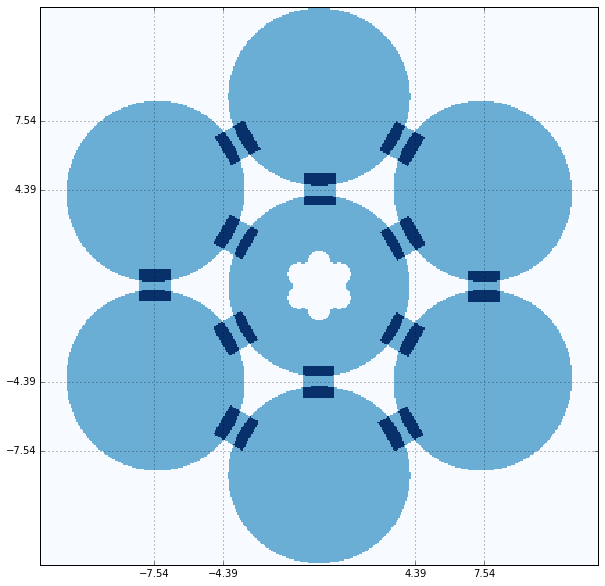

In [7]:
rc = 4.387
rp = 7.543
R = D/2
fig, ax1 = subplots()
fig.set_size_inches((10,10))
#ax1.imshow(src.amplitude.host(),extent=[-R,R,-R,R],interpolation='None',origin='lower')
ax1.imshow(src.amplitude.host()+sps.M.f.host(shape=(src.N_SRC*nPx,nPx)),extent=[-R,R,-R*src.N_SRC,src.N_SRC*R],interpolation='None',cmap='Blues',origin='lower')
ax1.grid()
ax1.set_xticks([-rp,-rc,rc,rp])
ax1.set_yticks([-rp,-rc,rc,rp])
for k in range(src.N_SRC):
    c1 = Circle((0,(k-1)*D),radius=rc, color='r', fill=False)
    ax1.add_patch(c1)
    c2 = Circle((0,(k-1)*D),radius=rp, color='r', fill=False)
    ax1.add_patch(c2)

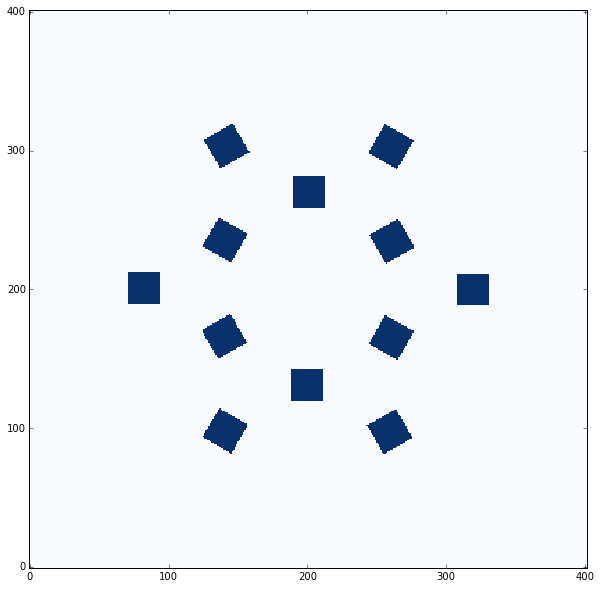

In [8]:
fig, ax1 = subplots()
fig.set_size_inches((10,10))
h = ax1.imshow(sps.M.f.host(shape=(src.N_SRC*nPx,nPx)),interpolation='None',cmap='Blues',origin='lower')
#colorbar(h)

<matplotlib.colorbar.Colorbar instance at 0x2ae077154cb0>

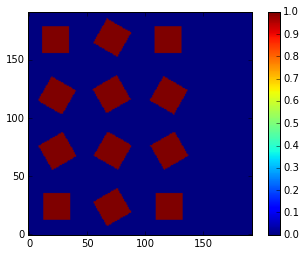

In [9]:
imshow(sps.L.f.host(shape=(24*2*4,24*2*4)),origin='lower')
colorbar()

In [10]:
nPx**2

161604